In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install() 

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:24
🔁 Restarting kernel...


In [ ]:
! git clone https://github.com/IBM/differential-privacy-library

Cloning into 'differential-privacy-library'...
remote: Enumerating objects: 4029, done.
remote: Counting objects: 100% (979/979), done.
remote: Compressing objects: 100% (430/430), done.
remote: Total 4029 (delta 689), reused 715 (delta 549), pack-reused 3050
Receiving objects: 100% (4029/4029), 2.16 MiB | 6.85 MiB/s, done.
Resolving deltas: 100% (2920/2920), done.


In [ ]:
! pip install diffprivlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 35.3 MB/s eta 0:00:00
  Created wheel for crlibm: filename=crlibm-1.0.3-cp37-cp37m-linux_x86_64.whl size=176994 sha256=90bdc8976755942649953fb6b3acff04c3f106fd4b2b2f2550cf7a578a919035
  Stored in directory: /root/.cache/pip/wheels/d5/49/76/c2047e63fe9162b0b156dd4c0656b5ee1e3d8a2d6cfc56132c
Successfully built crlibm


In [ ]:
%cd differential-privacy-library

/content/differential-privacy-library


In [ ]:
import pandas as pd
import numpy as np
xl=pd.ExcelFile("/content/TableauSalesData1.xlsx")
df=xl.parse("Orders")
#print(df.head())


In [ ]:

df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
SubCatProfits=df[["Sub-Category","Sales","Profit"]]
print(SubCatProfits)

     Sub-Category    Sales    Profit
0       Bookcases  173.940   38.2668
1          Phones  231.980   67.2742
2         Storage  114.460   28.6150
3     Accessories   30.080   -5.2640
4     Accessories  165.600   -6.2100
...           ...      ...       ...
9989      Binders  364.800  167.8080
9990      Storage  152.688  -26.7204
9991    Fasteners    3.488    0.5668
9992     Supplies    5.888   -1.3248
9993      Binders  116.400   52.3800

[9994 rows x 3 columns]


In [ ]:
TotalSubCatProfits=SubCatProfits.groupby(by="Sub-Category").sum()
print(TotalSubCatProfits)

                    Sales      Profit
Sub-Category                         
Accessories   167380.3180  41936.6357
Appliances    107532.1610  18138.0054
Art            27118.7920   6527.7870
Binders       203412.7330  30221.7633
Bookcases     114879.9963  -3472.5560
Chairs        328449.1030  26590.1663
Copiers       149528.0300  55617.8249
Envelopes      16476.4020   6964.1767
Fasteners       3024.2800    949.5182
Furnishings    91705.1640  13059.1436
Labels         12486.3120   5546.2540
Machines      189238.6310   3384.7569
Paper          78479.2060  34053.5693
Phones        330007.0540  44515.7306
Storage       223843.6080  21278.8264
Supplies       46673.5380  -1189.0995
Tables        206965.5320 -17725.4811


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

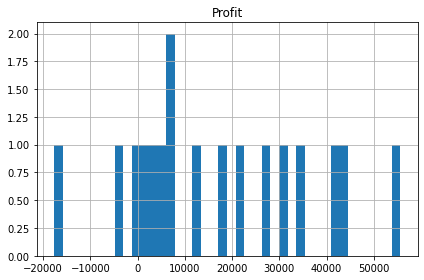

In [ ]:
TotalSubCatProfits['Profit'].hist(bins=40)
ax = plt.gca()
ax.set_title('Profit')
plt.tight_layout()
plt.show()

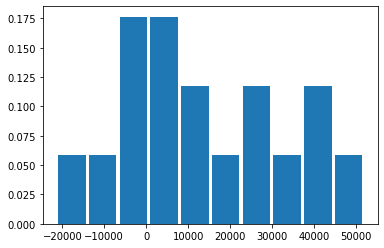

In [ ]:
hist, bins = np.histogram(TotalSubCatProfits['Profit'])
hist = hist / hist.sum()
plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]) * 0.9)
plt.show()

/usr/local/lib/python3.7/site-packages/diffprivlib/tools/histograms.py:132: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  "specified independently of the data (i.e., using domain knowledge).", PrivacyLeakWarning)


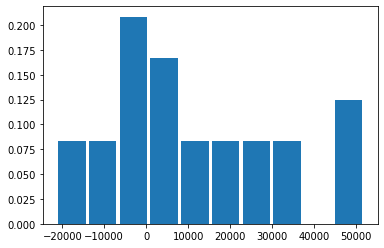

In [ ]:
from diffprivlib import tools as dp
dp_hist, dp_bins = dp.histogram(TotalSubCatProfits['Profit'])
dp_hist = dp_hist / dp_hist.sum()

plt.bar(dp_bins[:-1], dp_hist, width=(dp_bins[1] - dp_bins[0]) * 0.9)
plt.show()

In [ ]:
dp_bins[0], dp_bins[-1]          #Privacy Leak # We know for sure the lowest profit is -17725.481100000005 and highest is 55617.82489999999

(-17725.481100000005, 55617.82489999999)

In [ ]:
np.all(dp_bins == bins)   #We can see very little difference in the values of the histgram we have not set privacy guarantee

True

/usr/local/lib/python3.7/site-packages/diffprivlib/tools/histograms.py:132: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  "specified independently of the data (i.e., using domain knowledge).", PrivacyLeakWarning)


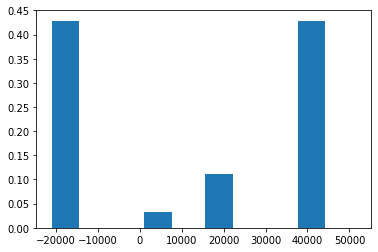

In [ ]:
dp_hist2, dp_bins2 = dp.histogram(TotalSubCatProfits['Profit'], epsilon=0.1,)  #An epsilon of 0.1 still preserves the broad structure of the histogram
dp_hist2 = dp_hist2 / dp_hist2.sum()

plt.bar(dp_bins2[:-1], dp_hist2, width=(dp_bins2[1] - dp_bins2[0]) * 0.9)
plt.show()

/usr/local/lib/python3.7/site-packages/diffprivlib/tools/histograms.py:132: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  "specified independently of the data (i.e., using domain knowledge).", PrivacyLeakWarning)


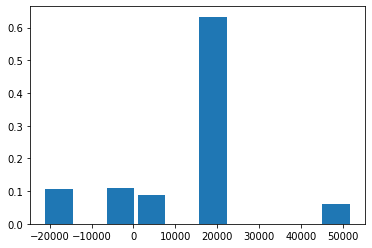

In [ ]:
dp_hist2, dp_bins2 = dp.histogram(TotalSubCatProfits['Profit'], epsilon=0.01,)  #Effect of epsilon: If we decrease epsilon (i.e. increase the privacy guarantee), the error will increase.
dp_hist2 = dp_hist2 / dp_hist2.sum()

plt.bar(dp_bins2[:-1], dp_hist2, width=(dp_bins2[1] - dp_bins2[0]) * 0.9)
plt.show()

In [ ]:
print("Total histogram error: %f" % np.abs(hist - dp_hist).sum())

Total histogram error: 0.117647


In [ ]:
dp_hist, dp_bins = dp.histogram(TotalSubCatProfits['Profit'], epsilon=0.001)    #Effect of epsilon: If we decrease epsilon (i.e. increase the privacy guarantee), the error will increase.
dp_hist = dp_hist / dp_hist.sum()

print("Total histogram error: %f" % np.abs(hist - dp_hist).sum())

Total histogram error: 1.024873


/usr/local/lib/python3.7/site-packages/diffprivlib/tools/histograms.py:132: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  "specified independently of the data (i.e., using domain knowledge).", PrivacyLeakWarning)


In [ ]:
### Machine Learning Demo 

from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)






In [ ]:

#Now we run differential private Naive Bayes

from diffprivlib.models import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/diffprivlib/models/naive_bayes.py:101: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  "privacy leakage, specify bounds for each dimension.", PrivacyLeakWarning)


GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0)]),
           bounds=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])))

In [ ]:
#The privacy level is controlled by the parameter epsilon, which is passed to the classifier at initialisation (e.g. GaussianNB(epsilon=0.1)). The default is epsilon = 1.0.

clf = GaussianNB(epsilon=0.1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/diffprivlib/models/naive_bayes.py:101: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  "privacy leakage, specify bounds for each dimension.", PrivacyLeakWarning)


GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (0.1, 0)]),
           bounds=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])),
           epsilon=0.1)

In [ ]:
clf.predict(X_test)

array([2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 2, 2, 1, 1])

In [ ]:
print("Test accuracy: %f" % clf.score(X_test, y_test))

Test accuracy: 0.366667


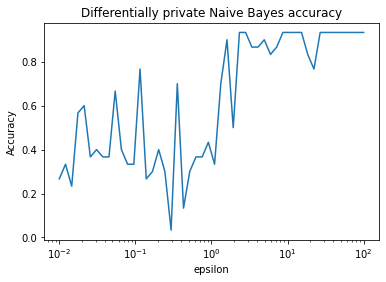

In [ ]:
#We can easily evaluate the accuracy of the model for various epsilon values and plot it with matplotlib

import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 2, 50)
bounds = ([4.3, 2.0, 1.1, 0.1], [7.9, 4.4, 6.9, 2.5])
accuracy = list()

for epsilon in epsilons:
    clf = GaussianNB(bounds=bounds, epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append(clf.score(X_test, y_test))

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#GOOGLE TOOL PyDP 


!pip install python-dp # installing PyDP



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 35.3 MB/s eta 0:00:00


In [ ]:
#Differentially Private Sum


import pydp as dp # by convention our package is to be imported as dp (dp for Differential Privacy!)
from pydp.algorithms.laplacian import BoundedSum, BoundedMean, Count, Max



In [ ]:
dp_sum_TotalSubCatProfits = BoundedSum(epsilon= 1.5, lower_bound =  5, upper_bound = 25000, dtype ='float') # Depending on the bounded limit one chooses we get different sum values 
dp_sum_og = dp_sum_TotalSubCatProfits.quick_result(TotalSubCatProfits['Sales'].to_list())
dp_sum_og = round(dp_sum_og, 2)
print(dp_sum_og)

355012.12


In [ ]:
#Differentially Private Average

dp_mean_TotalSubCatProfits=BoundedMean(epsilon= 1.5, lower_bound =  5, upper_bound = 25000, dtype ='float')
dp_mean_og = dp_mean_TotalSubCatProfits.quick_result(TotalSubCatProfits['Sales'].to_list())
dp_mean_og = round(dp_mean_og, 2)
print(dp_mean_og)


21150.6
